In [18]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

## Overall Sentiment Divergence

In [19]:
df_bg = pd.read_csv("ParlaMint-BG-SENT.csv", delimiter = ",", dtype = object)
df_bg["Score"] = df_bg["Score"].astype(float)
df_bg["Word_total"] = df_bg["Word_total"].astype(float)
df_bg["Sentiment"] = df_bg["Sentiment"].astype(float)
df_bg = df_bg[df_bg["Speaker_role"]!= "Chairperson"]
#df_bg = df_bg[df_bg["Word_total"]>15]
df_bg = df_bg.drop(df_bg[(df_bg["Speaker_Minister"] == "-") & (df_bg["Speaker_MP"] == "notMP")].index)

In [20]:
(df_bg["Word_total"]<15).sum()/len(df_bg)

0.21606395758253594

<AxesSubplot:>

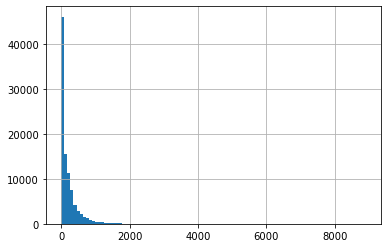

In [21]:
df_bg["Word_total"].hist(bins = 100)

In [22]:
nocom = df_bg[df_bg["Comission"] == "False"]

In [23]:
df_bg.groupby(["Party_status"], dropna = False)["Sentiment"].sum() / df_bg.groupby(["Party_status"], dropna = False)["Word_total"].sum()

Party_status
Coalition     0.035140
Opposition    0.037638
NaN           0.039511
dtype: float64

In [24]:
nocom.groupby(["Party_status"], dropna = False)["Sentiment"].sum() / nocom.groupby(["Party_status"], dropna = False)["Word_total"].sum()

Party_status
Coalition     0.041053
Opposition    0.038311
NaN           0.040004
dtype: float64

In [25]:
nocom.groupby(["Party_status"], dropna = False)["Score"].mean()

Party_status
Coalition     0.035141
Opposition    0.038087
NaN           0.041981
Name: Score, dtype: float64

In [26]:
df_bg.groupby(["Party_status", "Comission"], dropna = False)["Sentiment"].sum() / df_bg.groupby(["Party_status", "Comission"], dropna = False)["Word_total"].sum()

Party_status  Comission
Coalition     False        0.041053
              True         0.019551
Opposition    False        0.038311
              True         0.021657
NaN           False        0.040004
              True         0.020787
dtype: float64

In [10]:
status = df_bg.groupby(["Party_status", "Comission"], dropna = False)["Sentiment"].sum() / df_bg.groupby(["Party_status", "Comission"], dropna = False)["Word_total"].sum()

Text(0.5, 1.0, 'Sentiment by Party Status')

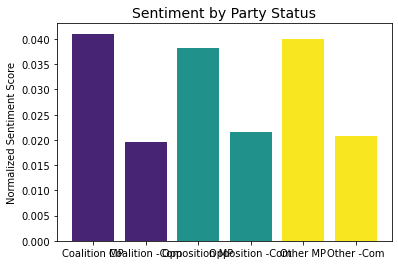

In [11]:
cmap = plt.cm.get_cmap('viridis')
labels = ["Coalition MP", "Coalition -Com", "Opposition MP", "Opposition -Com", "Other MP", "Other -Com"]
plt.bar(labels, status.to_numpy(), color = [cmap(0.1), cmap(0.1), cmap(0.5), cmap (0.5), cmap(0.99), cmap(0.99)])
plt.ylabel("Normalized Sentiment Score")
plt.title("Sentiment by Party Status", fontsize = 14)

In [15]:
nocom = nocom[nocom["Caretaker"] == "False"]

In [16]:
nocom.groupby(["Party_status", "Speaker_party"], dropna = False)["Sentiment"].sum() / nocom.groupby(["Party_status", "Speaker_party"], dropna = False)["Word_total"].sum()

Party_status  Speaker_party
Coalition     ABV              0.045635
              BSPFB            0.037834
              DB               0.044620
              GERB             0.042067
              RB               0.039914
              TISP             0.036217
              UP               0.038304
              WCC              0.039234
Opposition    BSPFB            0.037190
              BSPLB            0.037375
              GERB-UDF         0.037838
              MRF              0.041019
              PF               0.039098
              RP               0.034609
              VOLYA            0.046951
NaN           AP               0.033616
              BDC-NU           0.042759
              GERB             0.054716
              NaN              0.042619
dtype: float64

## By Status and Gender

In [12]:
statusgender = df_bg.groupby(["Speaker_gender", "Party_status"], dropna = False)["Sentiment"].sum() / df_bg.groupby(["Speaker_gender", "Party_status"], dropna = False)["Word_total"].sum()

In [13]:
statusgender

Speaker_gender  Party_status
F               Coalition       0.032463
                Opposition      0.041019
                NaN             0.040580
M               Coalition       0.036610
                Opposition      0.036927
                NaN             0.039325
dtype: float64

In [14]:
statusgender = df_bg.groupby(["Party_status", "Speaker_gender"], dropna = False)["Sentiment"].sum() / df_bg.groupby(["Party_status", "Speaker_gender"], dropna = False)["Word_total"].sum()

In [15]:
statusgender

Party_status  Speaker_gender
Coalition     F                 0.032463
              M                 0.036610
Opposition    F                 0.041019
              M                 0.036927
NaN           F                 0.040580
              M                 0.039325
dtype: float64

<AxesSubplot:xlabel='Party Status', ylabel='Sentiment Score'>

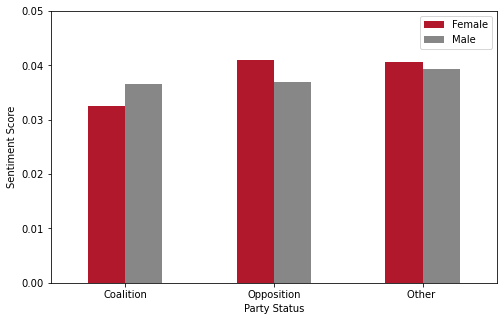

In [22]:
plt.rcParams["figure.figsize"] = (8,5)
test_df = pd.DataFrame({'Party Status': ['Coalition', 'Opposition', "Other "], 
                        'Female': statusgender.to_numpy()[0::2], 'Male': statusgender.to_numpy()[1::2]})

# set name as the index and then Transpose the dataframe
test_df = test_df.set_index('Party Status')
cmap = plt.get_cmap("RdGy")(np.linspace(0.1, 0.8, 2))

#display(test_df)

# plot and annotate
test_df.plot(kind='bar', rot=0, ylabel = "Sentiment Score", 
            color = cmap, ylim = (0, 0.05))



In [23]:
df_bg.columns

Index(['Unnamed: 0', 'ID', 'Sentiment', 'Word_total', 'Score', 'Negscore',
       'Title', 'Date', 'Body', 'Term', 'Session', 'Meeting', 'Sitting',
       'Agenda', 'Subcorpus', 'Speaker_role', 'Speaker_MP', 'Speaker_Minister',
       'Speaker_party', 'Speaker_party_name', 'Party_status', 'Speaker_name',
       'Speaker_gender', 'Speaker_birth', 'Topic_title', 'Meeting_type',
       'Comission', 'YearMonth', 'Government', 'Caretaker', 'Bloc'],
      dtype='object')

In [24]:
df_bg.groupby(["Comission","Party_status", "Speaker_gender"])["Score"].count() 

Comission  Party_status  Speaker_gender
False      Coalition     F                  7501
                         M                 23940
           Opposition    F                  7181
                         M                 34948
True       Coalition     F                  6159
                         M                  4480
           Opposition    F                    88
                         M                  1543
Name: Score, dtype: int64

In [25]:
df_bg.groupby(["Comission"], dropna = False)["Word_total"].mean()

Comission
False    195.713007
True     224.673334
Name: Word_total, dtype: float64

In [26]:
df_bg.groupby(["Comission"], dropna = False)["Word_total"].sum() /df_bg["Word_total"].sum()

Comission
False    0.853641
True     0.146359
Name: Word_total, dtype: float64

In [27]:
statusgender = nocom[nocom["Caretaker"] == "False"].groupby(["Party_status", "Speaker_gender"], dropna = False)["Sentiment"].sum() / nocom[nocom["Caretaker"] == "False"].groupby(["Party_status", "Speaker_gender"], dropna = False)["Word_total"].sum()

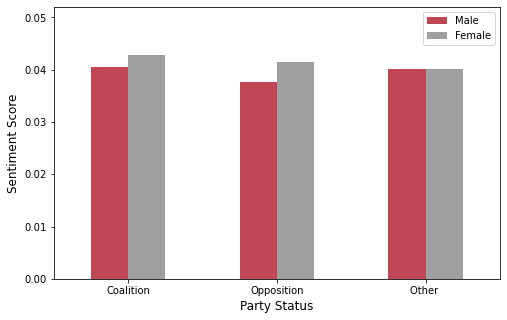

In [66]:
test_df = pd.DataFrame({'Party Status': ['Coalition', 'Opposition', "Other "], 
                        'Male': statusgender.to_numpy()[1::2], 'Female': statusgender.to_numpy()[0::2]})

plt.rcParams["figure.figsize"] = (8,5)
cmap = plt.get_cmap("RdGy")(np.linspace(0.1, 0.8, 2))



# set name as the index and then Transpose the dataframe
test_df = test_df.set_index('Party Status')

#display(test_df)

# plot and annotate
bar = test_df.plot(kind='bar', rot=0, color = cmap, figsize = (8,5), alpha = 0.8)
plt.ylim([0, 0.052]);
plt.ylabel("Sentiment Score", fontsize = 12)
plt.xlabel("Party Status", fontsize = 12)
#plt.title("Sentiment by Party Status, Gender", fontsize = 14)

plt.show()


### By-Speech Gender and Status

#### Histogram

In [32]:
import numpy as np
from scipy.stats import ttest_ind

v1 = nocom[nocom["Caretaker"] == "False"][nocom[nocom["Caretaker"] == "False"]["Party_status"] == "Coalition"]["Score"].to_numpy()
v2 = nocom[nocom["Caretaker"] == "False"][nocom[nocom["Caretaker"] == "False"]["Party_status"] == "Opposition"]["Score"].to_numpy()

res = ttest_ind(v1, v2)

print(res)

/Users/yananikolova/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Ttest_indResult(statistic=-7.209465979109046, pvalue=5.671320181448349e-13)


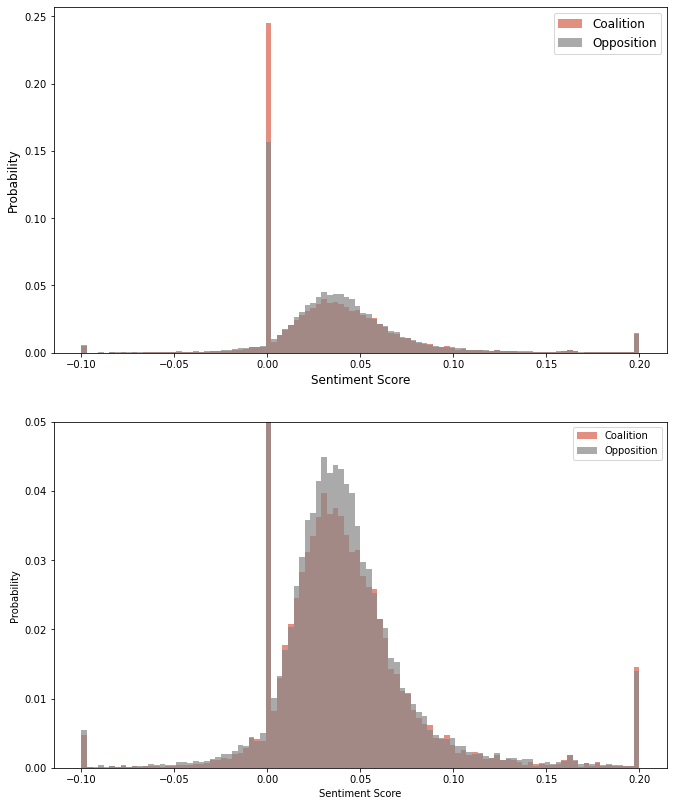

In [69]:
from matplotlib.ticker import PercentFormatter
import seaborn as sns

fig, ax = plt.subplots(2,1, figsize = (11,14))
cmap = plt.get_cmap("RdGy")
 
sns.histplot(np.clip(v1, -0.1, 0.2), stat='probability', bins = 100, kde=False, alpha = 0.7, 
             color = cmap(0.2), edgecolor = None, label = "Coalition", ax = ax[0])
sns.histplot(np.clip(v2, -0.1, 0.2), stat='probability', bins = 100, kde=False, alpha = 0.7, 
             color = cmap(0.8), edgecolor = None, label = "Opposition", ax = ax[0])

sns.histplot(np.clip(v1, -0.1, 0.2), stat='probability', bins = 100, kde=False, alpha = 0.7, 
             color = cmap(0.2), edgecolor = None, label = "Coalition", ax = ax[1])
sns.histplot(np.clip(v2, -0.1, 0.2), stat='probability', bins = 100, kde=False, alpha = 0.7, 
             color = cmap(0.8), edgecolor = None, label = "Opposition", ax = ax[1])
ax[0].set_yscale('linear')
ax[1].set_ylim([0,0.05])


ax[0].set_xlabel("Sentiment Score", fontsize = 12)
ax[0].set_ylabel("Probability", fontsize = 12)


ax[1].set_xlabel("Sentiment Score")


#ax[0].set_title("Speech Score Histogram", fontsize = 15)
ax[0].legend(fontsize = 12);
ax[1].legend();


plt.show()




In [26]:
import numpy as np
from scipy.stats import ttest_ind

v1 = nocom[(nocom["Party_status"] == "Coalition") & (nocom["Caretaker"] == "False")]["Score"].to_numpy()
v2 = nocom[(nocom["Party_status"] == "Opposition")  & (nocom["Caretaker"] == "False")]["Score"].to_numpy()

res = ttest_ind(v1, v2)

print(res)

Ttest_indResult(statistic=-7.209465979109046, pvalue=5.671320181448349e-13)


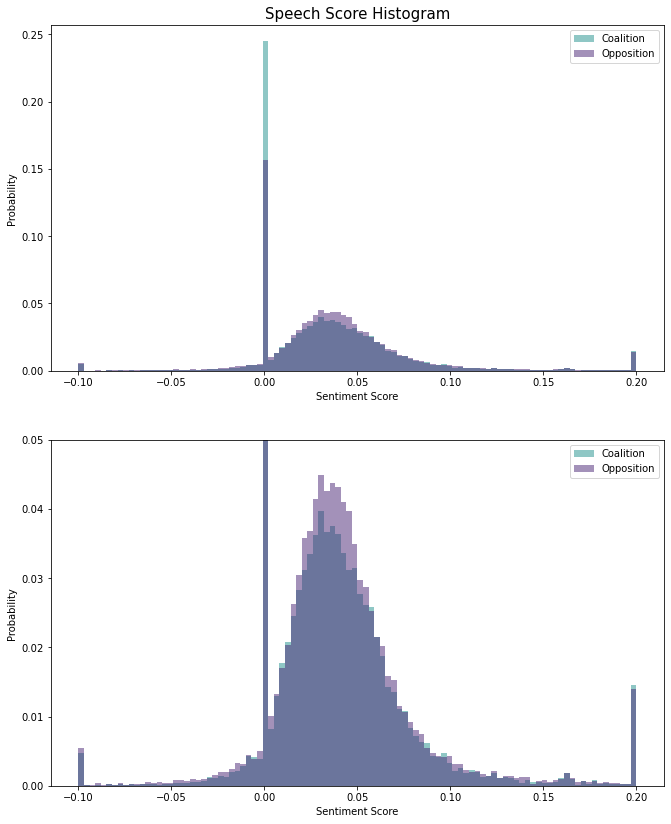

In [27]:
from matplotlib.ticker import PercentFormatter
import seaborn as sns

fig, ax = plt.subplots(2,1, figsize = (11,14))

 
sns.histplot(np.clip(v1, -0.1, 0.2), stat='probability', bins = 100, kde=False, alpha = 0.5, 
             color = cmap(0.5), edgecolor = None, label = "Coalition", ax = ax[0])
sns.histplot(np.clip(v2, -0.1, 0.2), stat='probability', bins = 100, kde=False, alpha = 0.5, 
             color = cmap(0.1), edgecolor = None, label = "Opposition", ax = ax[0])

sns.histplot(np.clip(v1, -0.1, 0.2), stat='probability', bins = 100, kde=False, alpha = 0.5, 
             color = cmap(0.5), edgecolor = None, label = "Coalition", ax = ax[1])
sns.histplot(np.clip(v2, -0.1, 0.2), stat='probability', bins = 100, kde=False, alpha = 0.5, 
             color = cmap(0.1), edgecolor = None, label = "Opposition", ax = ax[1])
ax[0].set_yscale('linear')
ax[1].set_ylim([0,0.05])


ax[0].set_xlabel("Sentiment Score")
ax[1].set_xlabel("Sentiment Score")


ax[0].set_title("Speech Score Histogram", fontsize = 15)
ax[0].legend();
ax[1].legend();


plt.show()



In [28]:
(df_bg[df_bg["Score"] == 0.0]["Word_total"] < 10).sum() / len(df_bg[df_bg["Score"] == 0.0])

0.6453996983408749

In [29]:
df_bg[df_bg["Score"] == 0.0]

,Unnamed: 0,ID,Sentiment,Word_total,Score,Negscore,Title,Date,Body,Term,...,Speaker_name,Speaker_gender,Speaker_birth,Topic_title,Meeting_type,Comission,YearMonth,Government,Caretaker,Bloc
12,12,ParlaMint-BG_2014-10-27.u20,0.0,3.0,0.0,0.0,Report of the meeting of the Bulgarian Nationa...,2014-10-27,NaN,43,...,"Летиф Рашидов, Вежди",M,1951,NaN,NaN,False,2014-10,Bliznashki,True,Right
14,14,ParlaMint-BG_2014-10-27.u22,0.0,4.0,0.0,0.0,Report of the meeting of the Bulgarian Nationa...,2014-10-27,NaN,43,...,"Летиф Рашидов, Вежди",M,1951,NaN,NaN,False,2014-10,Bliznashki,True,Right
26,26,ParlaMint-BG_2014-10-27.u33,0.0,3.0,0.0,0.0,Report of the meeting of the Bulgarian Nationa...,2014-10-27,NaN,43,...,"Славов Чуколов, Десислав",M,1974,NaN,NaN,False,2014-10,Bliznashki,True,Right
48,48,ParlaMint-BG_2014-10-27.u53,0.0,1.0,0.0,0.0,Report of the meeting of the Bulgarian Nationa...,2014-10-27,NaN,43,...,"Симеонов Симеонов, Валери",M,1955,ИЗБОР НА ЗАМЕСТНИК-ПРЕДСЕДАТЕЛИ НА НАРОДНОТО С...,ИЗБОР,False,2014-10,Bliznashki,True,Right
79,79,ParlaMint-BG_2014-10-27.u81,0.0,21.0,0.0,0.0,Report of the meeting of the Bulgarian Nationa...,2014-10-27,NaN,43,...,"Georgiev Kalfin, Ivaylo",M,1964,ПРОЕКТ НА РЕШЕНИЕ ЗА ИЗБИРАНЕ НА ВРЕМЕННИ СЕКР...,ПРОЕКТ,False,2014-10,Bliznashki,True,Left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209997,199,ParlaMint-BG_2016-03-24.u81,0.0,16.0,0.0,0.0,Report of the meeting of the Bulgarian Nationa...,2016-03-24,NaN,43,...,"Вълчева Караянчева, Цвета",F,1968,ВТОРО ГЛАСУВАНЕ НА ЗАКОНОПРОЕКТА ЗА ИЗМЕНЕНИЕ ...,ГЛАСУВАНЕ,True,2016-03,Borisov II,False,Right
210001,203,ParlaMint-BG_2016-03-24.u85,0.0,20.0,0.0,0.0,Report of the meeting of the Bulgarian Nationa...,2016-03-24,NaN,43,...,"Вълчева Караянчева, Цвета",F,1968,ВТОРО ГЛАСУВАНЕ НА ЗАКОНОПРОЕКТА ЗА ИЗМЕНЕНИЕ ...,ГЛАСУВАНЕ,False,2016-03,Borisov II,False,Right
210003,205,ParlaMint-BG_2016-03-24.u87,0.0,12.0,0.0,0.0,Report of the meeting of the Bulgarian Nationa...,2016-03-24,NaN,43,...,"Вълчева Караянчева, Цвета",F,1968,ВТОРО ГЛАСУВАНЕ НА ЗАКОНОПРОЕКТА ЗА ИЗМЕНЕНИЕ ...,ГЛАСУВАНЕ,True,2016-03,Borisov II,False,Right
210005,207,ParlaMint-BG_2016-03-24.u89,0.0,13.0,0.0,0.0,Report of the meeting of the Bulgarian Nationa...,2016-03-24,NaN,43,...,"Вълчева Караянчева, Цвета",F,1968,ВТОРО ГЛАСУВАНЕ НА ЗАКОНОПРОЕКТА ЗА ИЗМЕНЕНИЕ ...,ГЛАСУВАНЕ,True,2016-03,Borisov II,False,Right


In [27]:
df_bg[df_bg["Score"] == 0.0].groupby(["Meeting_type"])["Score"].count()

Meeting_type
ГЛАСУВАНЕ       10996
ДОКЛАД            320
ЗАКОНОПРОЕКТ     1298
ИЗБОР             544
ИЗСЛУШВАНЕ        511
КОНТРОЛ           245
ОСТАВКА             6
ОТНОСНО            19
ОТЧЕТ              51
ПРЕДСТАВЯНЕ         6
ПРОЕКТ           2270
ПРОЕКТИ           165
ПРОМЕНИ            22
РАЗИСКВАНИЯ        60
РЕШЕНИЕ            91
ЧЕТЕНЕ            630
Name: Score, dtype: int64

In [28]:
df_bg[df_bg["Score"] != 0.0]["Word_total"].mean()

247.4292328559877

#### Significance tests

In [32]:
df_bg.groupby(["Party_status", "Speaker_Minister", "Speaker_gender"], dropna = False)["Score"].apply(list)

Party_status  Speaker_Minister  Speaker_gender
Coalition     -                 F                 [0.0327631206115072, 0.042696143213887934, 0.0...
                                M                 [0.006588439627045427, -0.0182015248759302, 0....
Opposition    -                 F                 [0.0, 0.0, 0.05295474275172567, 0.068290387525...
                                M                 [0.040370464951826834, 0.049363026250151966, 0...
NaN           -                 F                 [0.1210150177978173, 0.055606902807249815, 0.3...
                                M                 [0.06105800845271225, 0.0637275381559616, 0.06...
              Minister          F                 [0.016646351675544537, 0.11860148263511375, 0....
                                M                 [0.020803429048381294, 0.04937459629568864, 0....
Name: Score, dtype: object

In [33]:
lists = df_bg.groupby(["Party_status","Speaker_Minister", "Speaker_gender"], dropna = False)["Score"].apply(list)

In [34]:
from scipy.stats import ttest_ind

##### Gender differences

In [35]:
#coalition MP
ttest_ind(lists[0], lists[1])

Ttest_indResult(statistic=-15.199004400421108, pvalue=4.937663466220429e-52)

In [36]:
#coalition Min
ttest_ind(lists[2], lists[3])

Ttest_indResult(statistic=4.744297212800475, pvalue=2.0989082633489487e-06)

In [37]:
#opposition
ttest_ind(lists[4], lists[5])

Ttest_indResult(statistic=4.479827228575547, pvalue=7.554970455917573e-06)

In [38]:
#other
ttest_ind(lists[6], lists[7])

Ttest_indResult(statistic=0.3533669861761496, pvalue=0.7238943749510178)

###### Party Status Differences

In [39]:
#coalition MP vs Min
ttest_ind(lists[0]+lists[1], lists[2]+lists[3])

Ttest_indResult(statistic=-21.59794967838327, pvalue=3.540212374731623e-103)

In [40]:
#coalition vs oppositoin
ttest_ind(lists[0]+lists[1]+lists[2]+lists[3], lists[4]+lists[5])

Ttest_indResult(statistic=-12.608678102241685, pvalue=2.022088721587204e-36)

In [41]:
#opposition vs. other
ttest_ind(lists[4]+lists[5], lists[6]+lists[7])

Ttest_indResult(statistic=-3.957196284802508, pvalue=7.63235371106144e-05)

In [42]:
#coalition vs other
ttest_ind(lists[0]+lists[1]+lists[2]+lists[3], lists[6]+lists[7])

Ttest_indResult(statistic=-8.83311669854868, pvalue=1.036454520199601e-18)

## Sentiment Divergence over Time

In [38]:
timeseries = (nocom.groupby(["YearMonth", "Party_status"], dropna = False)["Sentiment"].sum() 
              / nocom.groupby(["YearMonth", "Party_status"], dropna = False)["Word_total"].sum())

In [39]:
coalition = nocom[nocom["Party_status"] == "Coalition"].groupby(["YearMonth"])["Sentiment"].sum() / nocom[nocom["Party_status"] == "Coalition"].groupby(["YearMonth"])["Word_total"].sum()
opposition = nocom[nocom["Party_status"] == "Opposition"].groupby(["YearMonth"])["Sentiment"].sum() /nocom[nocom["Party_status"] == "Opposition"].groupby(["YearMonth"])["Word_total"].sum()
other = nocom[nocom["Party_status"].isna()].groupby(["YearMonth"])["Sentiment"].sum() /nocom[nocom["Party_status"].isna()].groupby(["YearMonth"])["Word_total"].sum()

In [40]:
coalition.mean(), coalition.std(), coalition.sem(), coalition.autocorr()

(0.041150530305734866,
 0.0036335046648886976,
 0.00041141338855107273,
 0.20175604012310522)

In [41]:
opposition.mean(), opposition.std(), opposition.sem(), opposition.autocorr()

(0.03905872518334643,
 0.0036298173373882875,
 0.000405825915615375,
 0.2946058502084774)

In [42]:
other.mean(), other.std(), other.sem(), other.autocorr()

(0.04265244919433115,
 0.009733952275912835,
 0.0010684400683405345,
 0.3942420821663937)

In [43]:
timeseries

YearMonth  Party_status
2014-10    NaN             0.038956
2014-11    Coalition       0.035812
           Opposition      0.035910
           NaN             0.035107
2014-12    Coalition       0.038195
                             ...   
2022-06    Opposition      0.036138
           NaN             0.052237
2022-07    Coalition       0.039331
           Opposition      0.034730
           NaN             0.045118
Length: 241, dtype: float64

In [44]:
timeseries = timeseries.reset_index().pivot("YearMonth", "Party_status")

In [45]:
timeseries.columns = timeseries.columns.droplevel()

In [46]:
timeseries

Party_status,NaN,Coalition,Opposition
YearMonth,,,
2014-10,0.038956,NaN,NaN
2014-11,0.035107,0.035812,0.035910
2014-12,0.037879,0.038195,0.037616
2015-01,0.037754,0.041378,0.040740
2015-02,0.040202,0.045401,0.037097
...,...,...,...
2022-03,0.045059,0.039991,0.039120
2022-04,NaN,0.037973,0.035734
2022-05,0.045346,0.041957,0.036262


In [47]:
coalition = timeseries["Coalition"].to_numpy()
opposition = timeseries["Opposition"].to_numpy()
other = timeseries[np.nan].to_numpy()

In [48]:
index = timeseries.index

In [49]:
lines = ("2014-11", "2017-01", "2017-05", "2021-05", "2021-09", "2021-12")

In [50]:
for date in lines:
    x = np.where(index == date)[0][0]
    print(x)

1
26
28
73
76
77


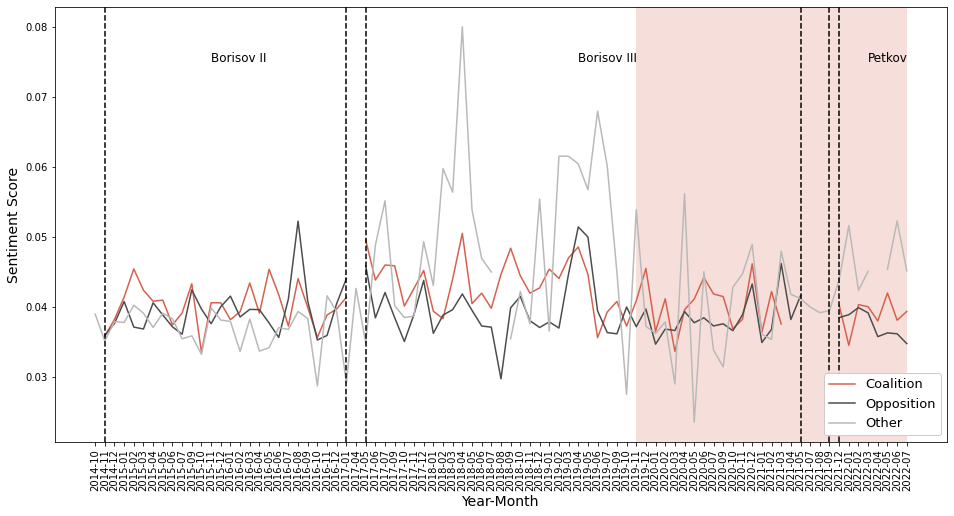

In [63]:
plt.rcParams["figure.figsize"] = (16,8)


plt.plot(index, coalition, label = "Coalition", color = cmap(0.2));
plt.plot(index, opposition, label = "Opposition", color = cmap(0.9));
plt.plot(index, other, label = "Other", color = cmap(0.7))
plt.xticks(rotation=90);
plt.xlabel("Year-Month", fontsize = 14)
plt.ylabel("Sentiment Score", fontsize = 14)
#plt.title("Sentiment over Time", fontsize = 16)
plt.text(12,0.075, "Borisov II", c = "black", fontsize = 12)
plt.text(50,0.075, "Borisov III", c = "black", fontsize = 12)
plt.text(80,0.075, "Petkov", c = "black", fontsize = 12)
plt.axvspan(56,84, facecolor= cmap(0.2), alpha=0.2, zorder=-10000)



for date in lines:
    x = np.where(index == date)[0][0]
    plt.axvline(x, c = "black", linestyle = "--")
plt.legend(fontsize = 13, loc = "lower right", framealpha = 1);

In [52]:
nocom.groupby(["Government", "Party_status"], dropna = False)["Sentiment"].sum() /nocom.groupby(["Government", "Party_status"], dropna = False)["Word_total"].sum() 

Government   Party_status
Bliznashki   NaN             0.038043
Borisov II   Coalition       0.040085
             Opposition      0.038490
             NaN             0.036951
Borisov III  Coalition       0.042249
             Opposition      0.038447
             NaN             0.045661
Gerdzhikov   NaN             0.041030
Petkov       Coalition       0.039103
             Opposition      0.037480
             NaN             0.049474
Yanev I      NaN             0.039409
Yanev II     NaN             0.043833
NaN          Opposition      0.039694
             NaN             0.041596
dtype: float64

In [53]:
nocom.groupby(["Subcorpus", "Party_status"], dropna = False)["Sentiment"].sum() / nocom.groupby(["Subcorpus", "Party_status"], dropna = False)["Word_total"].sum() 

Subcorpus  Party_status
COVID      Coalition       0.039674
           Opposition      0.037714
           NaN             0.040286
Reference  Coalition       0.041643
           Opposition      0.038646
           NaN             0.039780
dtype: float64

### By meeting type

In [29]:
df_bg["Meeting_name"] = pd.Series(dtype='str')

In [30]:
legislative = df_bg["Meeting_type"].isin(["ГЛАСУВАНЕ","ЧЕТЕНЕ", "ЗАКОНОПРОЕКТ"])
draft = df_bg["Meeting_type"].isin(["ПРОЕКТ", "ПРОЕКТИ", "РЕШЕНИЕ", "ИЗБОР", "ПРОМЕНИ"])
question = df_bg["Meeting_type"].isin(["ИЗСЛУШВАНЕ", "КОНТРОЛ"])

In [36]:
vote = df_bg["Meeting_type"].isin(["ГЛАСУВАНЕ"])
reading = df_bg["Meeting_type"].isin(["ЧЕТЕНЕ"])
draft_bill = df_bg["Meeting_type"].isin(["ЗАКОНОПРОЕКТ"])

In [31]:
df_bg["Meeting_name"] = df_bg["Meeting_name"].mask(legislative, other = "legislative")
df_bg["Meeting_name"] = df_bg["Meeting_name"].mask(draft, other = "draft decision")
df_bg["Meeting_name"] = df_bg["Meeting_name"].mask(question, other = "question")

In [38]:
df_bg["Meeting_name"] = df_bg["Meeting_name"].mask(vote, other = "vote")
df_bg["Meeting_name"] = df_bg["Meeting_name"].mask(reading, other = "reading")
df_bg["Meeting_name"] = df_bg["Meeting_name"].mask(draft_bill, other = "draft bill")

In [39]:
df_bg["Meeting_name"].unique()

array([nan, 'draft decision', 'draft bill', 'vote', 'question', 'reading'],
      dtype=object)

In [40]:
nocom = df_bg[df_bg["Comission"] == "False"]

In [41]:
df = nocom.groupby(["Meeting_name", "Party_status"], dropna = False)["Sentiment"].sum() / nocom.groupby(["Meeting_name", "Party_status"], dropna = False)["Word_total"].sum()

In [42]:
df

Meeting_name    Party_status
draft bill      Coalition       0.039980
                Opposition      0.037745
                NaN             0.038840
draft decision  Coalition       0.046596
                Opposition      0.040624
                NaN             0.038926
question        Coalition       0.043619
                Opposition      0.036351
                NaN             0.041380
reading         Coalition       0.035974
                Opposition      0.037838
                NaN             0.032374
vote            Coalition       0.038413
                Opposition      0.037367
                NaN             0.039693
NaN             Coalition       0.044388
                Opposition      0.039523
                NaN             0.041225
dtype: float64

In [87]:
nocom.groupby(["Meeting_name"], dropna = False)["Sentiment"].sum() / nocom.groupby(["Meeting_name"], dropna = False)["Word_total"].sum()

Meeting_name
draft decision    0.042736
legislative       0.038008
question          0.040021
NaN               0.041423
dtype: float64

In [88]:
df.to_numpy()[0:8:3] - df.to_numpy()[1:8:3]

array([0.00597291, 0.00106341, 0.00726739])

In [89]:
df_bg["Score"].mean()

0.03424112839038697

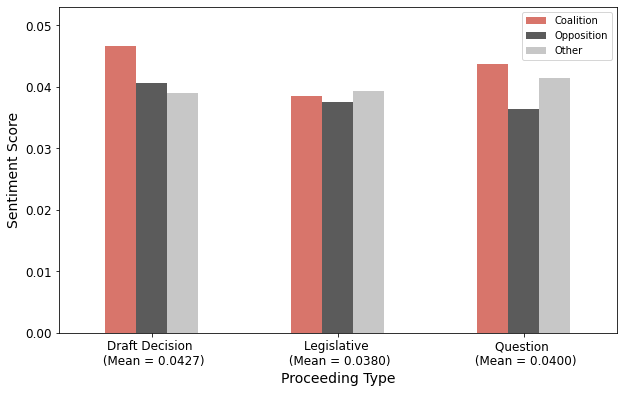

In [93]:
test_df = pd.DataFrame({'Meeting Type': ['Draft Decision \n (Mean = 0.0427)', 'Legislative \n (Mean = 0.0380)', 'Question \n (Mean = 0.0400)'], 
                        'Coalition': df.to_numpy()[0:9:3], "Opposition": df.to_numpy()[1:9:3], 
                        "Other": df.to_numpy()[2:9:3]})
plt.rcParams["figure.figsize"] = (10,6)


# set name as the index and then Transpose the dataframe
test_df = test_df.set_index('Meeting Type')

#display(test_df)

# plot and annotate
test_df.plot(kind='bar', rot=0, color = [cmap(0.18), cmap(0.95), cmap(0.7)], fontsize = 12, alpha = 0.8)
plt.xlabel("Proceeding Type", fontsize = 14)
plt.ylabel("Sentiment Score", fontsize = 14)
plt.ylim(0, 0.053)
#plt.title("Sentiment by Party Status, Meeting Type", fontsize = 14)
plt.show()



In [81]:
df = nocom.groupby(["Meeting_name", "Party_status", "Speaker_gender"], dropna = False)["Sentiment"].sum() / nocom.groupby(["Meeting_name", "Party_status", "Speaker_gender"], dropna = False)["Word_total"].sum()